对KDD99数据集进行处理

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing

In [98]:
# 数据读取
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [107]:
# 攻击数据标签
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


path = "./raw/kddcup.data_10_percent"
df = pd.read_csv(path,names=columns)
df
# target列先不做处理

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                   9   
1                    0       0    0  ...                  19   
2                    0       0    0  ...                  29   
3                    0       0    0  ...                  39   
4                    0       0    0  ...                  49   
...                ...     ...  ...  ...                 ...   
494016               0       0    0  ...                 255   
494017               0       0    0  ...                 255   
494018               0       0    0  ...                 255   
494019               0       0    0  ...                 255   
494020               0       0    0  ...                 255   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                          1.0                     0.0   
1                          1.0                     0.0   
2                          1.0                     0.0   
3                          1.0                     0.0   
4                          1.0                     0.0   
...                        ...                     ...   
494016                     1.0                     0.0   
494017                     1.0                     0.0   
494018                     1.0                     0.0   
494019                     1.0                     0.0   
494020                     1.0                     0.0   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.11                         0.00   
1                              0.05                         0.00   
2                              0.03                         0.00   
3                              0.03                         0.00   
4                              0.02                         0.00   
...                             ...                          ...   
494016                         0.01                         0.05   
494017                         0.17                         0.05   
494018                         0.06                         0.05   
494019                         0.04                         0.05   
494020                         0.17                         0.05   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                   0.0   
1                       0.00                      0.00                   0.0   
2                       0.00                      0.00                   0.0   
3                       0.00                      0.00                   0.0   
4                       0.00                      0.00                   0.0   
...                      ...                       ...                   ...   
494016                  0.00                      0.01                   0.0   
494017                  0.00                      0.01                   0.0   
494018                  0.06                      0.01                   0.0   
494019                  

In [108]:
target1=df['target']
le = preprocessing.LabelEncoder()
#小类标签数字化，共23小类
labels_23_category =le.fit_transform(target1).astype(np.int64)
df["target_digit"]= labels_23_category
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                     1.0   
1                    0       0    0  ...                     1.0   
2                    0       0    0  ...                     1.0   
3                    0       0    0  ...                     1.0   
4                    0       0    0  ...                     1.0   
...                ...     ...  ...  ...                     ...   
494016               0       0    0  ...                     1.0   
494017               0       0    0  ...                     1.0   
494018               0       0    0  ...                     1.0   
494019               0       0    0  ...                     1.0   
494020               0       0    0  ...                     1.0   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  target_digit  
0                            0.0  normal.    

In [109]:
#添加大类标签，共五大类
df['attack_type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                     0.0   
1               0       0    0  ...                     0.0   
2               0       0    0  ...                     0.0   
3               0       0    0  ...                     0.0   
4               0       0    0  ...                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate   target  target_digit  attack_type  
0                       0.0  normal.            11       normal  
1                       0.0  normal.            11       normal  
2                       0.0  normal.            11       normal  
3                       0.0  normal.            11       normal  
4                       0.0  normal.            11       normal  

[5 rows x 44 columns]

In [110]:
target2=df["attack_type"]
le = preprocessing.LabelEncoder()
#小类标签数字化
labels_5_category =le.fit_transform(target2).astype(np.int64)
df["attack_type_digit"]=labels_5_category
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_src_port_rate  \
0                    0       0    0  ...                         0.11   
1                    0       0    0  ...                         0.05   
2                    0       0    0  ...                         0.03   
3                    0       0    0  ...                         0.03   
4                    0       0    0  ...                         0.02   
...                ...     ...  ...  ...                          ...   
494016               0       0    0  ...                         0.01   
494017               0       0    0  ...                         0.17   
494018               0       0    0  ...                         0.06   
494019               0       0    0  ...                         0.04   
494020               0       0    0  ...                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  target_digit  attack_type  \
0                            0.0  normal.            11       normal   
1                            0.0  normal.            11       normal   
2                            0.0  normal.            11       normal   
3                            0.0  normal.            11       normal   
4                            0.0  normal.            11       normal   
...                          ...      ...           ...          ...   
494016                       0.0  normal.            11       normal   
494017                       0.0  normal.            11       normal   
494018                       0.0  normal.            11       normal   
494019                       0.0  normal.            11       normal   
494020  

In [111]:
#保留这个数据，后面用于合并到处理后的数据中保存
labels=df[['target','target_digit','attack_type','attack_type_digit']]
labels

target  target_digit attack_type  attack_type_digit
0       normal.            11      normal                  1
1       normal.            11      normal                  1
2       normal.            11      normal                  1
3       normal.            11      normal                  1
4       normal.            11      normal                  1
...         ...           ...         ...                ...
494016  normal.            11      normal                  1
494017  normal.            11      normal                  1
494018  normal.            11      normal                  1
494019  normal.            11      normal                  1
494020  normal.            11      normal                  1

[494021 rows x 4 columns]

In [112]:
df.drop(columns=['target_digit', 'attack_type_digit'],inplace=True)
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                     1.0   
1                    0       0    0  ...                     1.0   
2                    0       0    0  ...                     1.0   
3                    0       0    0  ...                     1.0   
4                    0       0    0  ...                     1.0   
...                ...     ...  ...  ...                     ...   
494016               0       0    0  ...                     1.0   
494017               0       0    0  ...                     1.0   
494018               0       0    0  ...                     1.0   
494019               0       0    0  ...                     1.0   
494020               0       0    0  ...                     1.0   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
494016                         0.05                  0.00   
494017                         0.05                  0.00   
494018                         0.05                  0.06   
494019                         0.05                  0.04   
494020                         0.05                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                   0.0   
1                           0.00                   0.0   
2                           0.00                   0.0   
3                           0.00                   0.0   
4                           0.00                   0.0   
...                          ...                   ...   
494016                      0.01                   0.0   
494017                      0.01                   0.0   
494018                      0.01                   0.0   
494019                      0.01                   0.0   
494020                      0.01                   0.0   

        dst_host_srv_rerror_rate   target  attack_type  
0                            0.0  normal.     

In [113]:
df['target'].value_counts() #统计标签数量

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [114]:
# 查看是否有空列
df.isnull().sum()
# 都不是空列

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [115]:
# 找出非数值列
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns)-set(num_cols))
cat_cols.remove('target')
cat_cols.remove('attack_type')
cat_cols

['flag', 'service', 'protocol_type']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494021 entries, 0 to 0
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  object 
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  int64  
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13  root

<ipython-input-116-5d24c31dabea>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-116-5d24c31dabea>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


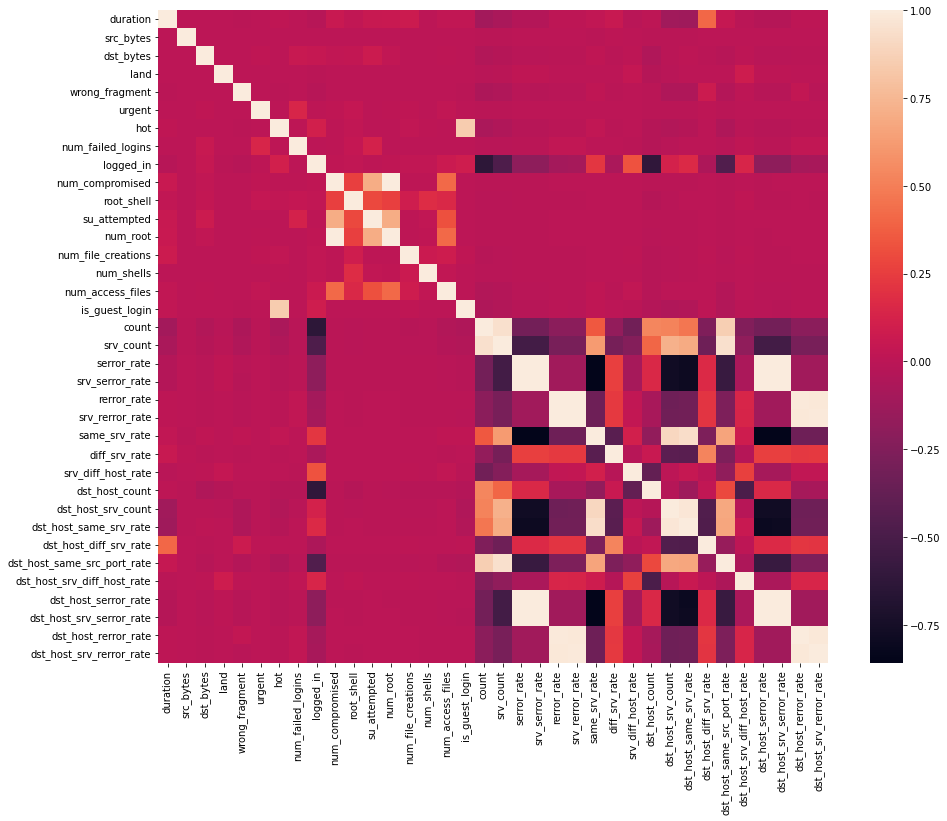

In [116]:
#去除空值、删除只有唯一值的列，查看列之间的相关性
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [117]:
#查看属性相关性，高相关的属性需要在后面删除一个，相当于去除冗余

In [118]:
#删除冗余属性
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [120]:
df_std = df.std().sort_values(ascending=True)
df_std

<ipython-input-120-681085cb52da>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std().sort_values(ascending=True)


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

特征映射

In [122]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [123]:
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0                    0       0    0  ...            1.0            0.0   
1                    0       0    0  ...            1.0            0.0   
2                    0       0    0  ...            1.0            0.0   
3                    0       0    0  ...            1.0            0.0   
4                    0       0    0  ...            1.0            0.0   
...                ...     ...  ...  ...            ...            ...   
494016               0       0    0  ...            1.0            0.0   
494017               0       0    0  ...            1.0            0.0   
494018               0       0    0  ...            1.0            0.0   
494019               0       0    0  ...            1.0            0.0   
494020               0       0    0  ...            1.0            0.0   

        srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                     0.00               9                   9   
1                     0.00              19                  19   
2                     0.00              29                  29   
3                     0.00              39                  39   
4                     0.00              49                  49   
...                    ...             ...                 ...   
494016                0.40              86                 255   
494017                0.00               6                 255   
494018                0.17              16                 255   
494019                0.17              26                 255   
494020                0.14               6                 255   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate   target  attack_type  
0                              0.00  normal.       normal  
1                              0.00  normal.       normal  
2                              0.00  normal.       normal  
3                              0.00  normal.       normal  
4                              0.00  normal.       normal  
...                             ...      ...          ...  
494016                         0.05  normal.       normal  
494017                         0.05  normal.       normal  
494018                         0.05  normal.       normal  
494019                         0.05  normal.       normal  
494020  

In [124]:
protocol_type_dum = pd.get_dummies(df['protocol_type'])
df = pd.concat([df,protocol_type_dum],axis=1)
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0                    0       0    0  ...               9                   9   
1                    0       0    0  ...              19                  19   
2                    0       0    0  ...              29                  29   
3                    0       0    0  ...              39                  39   
4                    0       0    0  ...              49                  49   
...                ...     ...  ...  ...             ...                 ...   
494016               0       0    0  ...              86                 255   
494017               0       0    0  ...               6                 255   
494018               0       0    0  ...              16                 255   
494019               0       0    0  ...              26                 255   
494020               0       0    0  ...               6                 255   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                          0.0                         0.11   
1                          0.0                         0.05   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.02   
...                        ...                          ...   
494016                     0.0                         0.01   
494017                     0.0                         0.17   
494018                     0.0                         0.06   
494019                     0.0                         0.04   
494020                     0.0                         0.17   

        dst_host_srv_diff_host_rate   target  attack_type  icmp  tcp  udp  
0                              0.00  normal.       normal     0    1    0  
1                              0.00  normal.       normal     0    1    0  
2                              0.00  normal.       normal     0    1    0  
3                              0.00  normal.       normal     0    1    0  
4                              0.00  normal.       normal     0    1    0  
...                             ...      ...          ...   ...  ...  ...  
494016                         0.05  normal.       normal     0    1    0  
494017                         0.05  normal.       normal     0    1    0  
494018                         0.05  normal.       normal     0    1    0  
494019                         0.05  normal.       normal     0    1    0  
494020                         0.05  normal.       normal     0    1    0  

[494021 rows x 36 columns]

In [125]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [126]:
flag_dum = pd.get_dummies(df['flag'])
df = pd.concat([df,flag_dum],axis=1)
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  REJ  RSTO  RSTOS0  RSTR  S0  S1  S2  \
0                    0       0    0  ...    0     0       0     0   0   0   0   
1                    0       0    0  ...    0     0       0     0   0   0   0   
2                    0       0    0  ...    0     0       0     0   0   0   0   
3                    0       0    0  ...    0     0       0     0   0   0   0   
4                    0       0    0  ...    0     0       0     0   0   0   0   
...                ...     ...  ...  ...  ...   ...     ...   ...  ..  ..  ..   
494016               0       0    0  ...    0     0       0     0   0   0   0   
494017               0       0    0  ...    0     0       0     0   0   0   0   
494018               0       0    0  ...    0     0       0     0   0   0   0   
494019               0       0    0  ...    0     0       0     0   0   0   0   
494020               0       0    0  ...    0     0       0     0   0   0   0   

        S3  SF  SH  
0        0   1   0  
1        0   1   0  
2        0   1   0  
3        0   1   0  
4        0   1   0  
...     ..  ..  ..  
494016   0   1   0  
494017   0   1   0  
494018   0   1   0  
494019   0   1   0  
494020   0   1   0  

[494021 rows x 47 columns]

In [127]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [128]:
service_dum = pd.get_dummies(df['service'])
df = pd.concat([df,service_dum],axis=1)
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  telnet  tftp_u  tim_i  time  urh_i  \
0                    0       0    0  ...       0       0      0     0      0   
1                    0       0    0  ...       0       0      0     0      0   
2                    0       0    0  ...       0       0      0     0      0   
3                    0       0    0  ...       0       0      0     0      0   
4                    0       0    0  ...       0       0      0     0      0   
...                ...     ...  ...  ...     ...     ...    ...   ...    ...   
494016               0       0    0  ...       0       0      0     0      0   
494017               0       0    0  ...       0       0      0     0      0   
494018               0       0    0  ...       0       0      0     0      0   
494019               0       0    0  ...       0       0      0     0      0   
494020               0       0    0  ...       0       0      0     0      0   

        urp_i  uucp  uucp_path  vmnet  whois  
0           0     0          0      0      0  
1           0     0          0      0      0  
2           0     0          0      0      0  
3           0     0          0      0      0  
4           0     0          0      0      0  
...       ...   ...        ...    ...    ...  
494016      0     0          0      0      0  
494017      0     0          0      0      0  
494018      0     0          0      0      0  
494019      0     0          0      0      0  
494020      0     0          0      0      0  

[494021 rows x 113 columns]

In [130]:
df.drop(['protocol_type','service','flag'],axis=1,inplace=True)

In [131]:
df

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        181       5450     0               0       0    0   
1              0        239        486     0               0       0    0   
2              0        235       1337     0               0       0    0   
3              0        219       1337     0               0       0    0   
4              0        217       2032     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
494016         0        310       1881     0               0       0    0   
494017         0        282       2286     0               0       0    0   
494018         0        203       1200     0               0       0    0   
494019         0        291       1200     0               0       0    0   
494020         0        219       1234     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  telnet  tftp_u  \
0                       0          1                0  ...       0       0   
1                       0          1                0  ...       0       0   
2                       0          1                0  ...       0       0   
3                       0          1                0  ...       0       0   
4                       0          1                0  ...       0       0   
...                   ...        ...              ...  ...     ...     ...   
494016                  0          1                0  ...       0       0   
494017                  0          1                0  ...       0       0   
494018                  0          1                0  ...       0       0   
494019                  0          1                0  ...       0       0   
494020                  0          1                0  ...       0       0   

        tim_i  time  urh_i  urp_i  uucp  uucp_path  vmnet  whois  
0           0     0      0      0     0          0      0      0  
1           0     0      0      0     0          0      0      0  
2           0     0      0      0     0          0      0      0  
3           0     0      0      0     0          0      0      0  
4           0     0      0      0     0          0      0      0  
...       ...   ...    ...    ...   ...        ...    ...    ...  
494016      0     0      0      0     0          0      0      0  
494017      0     0      0      0     0          0      0      0  
494018      0     0      0      0     0          0      0      0  
494019      0     0      0      0     0          0      0      0  
494020      0     0      0      0     0          0      0      0  

[494021 rows x 110 columns]

Normalization

数据归一化

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [133]:
df.drop(['target'],axis=1,inplace=True)
df

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        181       5450     0               0       0    0   
1              0        239        486     0               0       0    0   
2              0        235       1337     0               0       0    0   
3              0        219       1337     0               0       0    0   
4              0        217       2032     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
494016         0        310       1881     0               0       0    0   
494017         0        282       2286     0               0       0    0   
494018         0        203       1200     0               0       0    0   
494019         0        291       1200     0               0       0    0   
494020         0        219       1234     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  telnet  tftp_u  \
0                       0          1                0  ...       0       0   
1                       0          1                0  ...       0       0   
2                       0          1                0  ...       0       0   
3                       0          1                0  ...       0       0   
4                       0          1                0  ...       0       0   
...                   ...        ...              ...  ...     ...     ...   
494016                  0          1                0  ...       0       0   
494017                  0          1                0  ...       0       0   
494018                  0          1                0  ...       0       0   
494019                  0          1                0  ...       0       0   
494020                  0          1                0  ...       0       0   

        tim_i  time  urh_i  urp_i  uucp  uucp_path  vmnet  whois  
0           0     0      0      0     0          0      0      0  
1           0     0      0      0     0          0      0      0  
2           0     0      0      0     0          0      0      0  
3           0     0      0      0     0          0      0      0  
4           0     0      0      0     0          0      0      0  
...       ...   ...    ...    ...   ...        ...    ...    ...  
494016      0     0      0      0     0          0      0      0  
494017      0     0      0      0     0          0      0      0  
494018      0     0      0      0     0          0      0      0  
494019      0     0      0      0     0          0      0      0  
494020      0     0      0      0     0          0      0      0  

[494021 rows x 109 columns]

In [148]:
# Target variable and train set
Y = df[['attack_type']]
X = df.drop(['attack_type'], axis=1)
feature_name = X.columns.tolist()

sc = MinMaxScaler()
X = sc.fit_transform(X)
X,feature_name

(array([[0.00000000e+00, 2.61041764e-07, 1.05713002e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 ['duration',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'is_guest_log

In [135]:
data = pd.DataFrame(X, columns=feature_name)
data

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0            0.0  2.610418e-07   0.001057   0.0             0.0     0.0  0.0   
1            0.0  3.446905e-07   0.000094   0.0             0.0     0.0  0.0   
2            0.0  3.389216e-07   0.000259   0.0             0.0     0.0  0.0   
3            0.0  3.158461e-07   0.000259   0.0             0.0     0.0  0.0   
4            0.0  3.129617e-07   0.000394   0.0             0.0     0.0  0.0   
...          ...           ...        ...   ...             ...     ...  ...   
494016       0.0  4.470881e-07   0.000365   0.0             0.0     0.0  0.0   
494017       0.0  4.067060e-07   0.000443   0.0             0.0     0.0  0.0   
494018       0.0  2.927706e-07   0.000233   0.0             0.0     0.0  0.0   
494019       0.0  4.196859e-07   0.000233   0.0             0.0     0.0  0.0   
494020       0.0  3.158461e-07   0.000239   0.0             0.0     0.0  0.0   

        num_failed_logins  logged_in  num_compromised  ...  telnet  tftp_u  \
0                     0.0        1.0              0.0  ...     0.0     0.0   
1                     0.0        1.0              0.0  ...     0.0     0.0   
2                     0.0        1.0              0.0  ...     0.0     0.0   
3                     0.0        1.0              0.0  ...     0.0     0.0   
4                     0.0        1.0              0.0  ...     0.0     0.0   
...                   ...        ...              ...  ...     ...     ...   
494016                0.0        1.0              0.0  ...     0.0     0.0   
494017                0.0        1.0              0.0  ...     0.0     0.0   
494018                0.0        1.0              0.0  ...     0.0     0.0   
494019                0.0        1.0              0.0  ...     0.0     0.0   
494020                0.0        1.0              0.0  ...     0.0     0.0   

        tim_i  time  urh_i  urp_i  uucp  uucp_path  vmnet  whois  
0         0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
1         0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
2         0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
3         0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
4         0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
...       ...   ...    ...    ...   ...        ...    ...    ...  
494016    0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
494017    0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
494018    0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
494019    0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  
494020    0.0   0.0    0.0    0.0   0.0        0.0    0.0    0.0  

[494021 rows x 108 columns]

In [136]:
data = pd.concat([data,labels],axis=1)
data.to_csv('./prepocessed_data.csv')

一共有108列特征值，要输入CNN模型需要转换成m=n*n的特征数，尝试使用PCA降维

先计算降低的最佳维度

n_components：
* 默认值为保留所有特征值维度，即不进行主成分降维
* 取大于等于1的整数时，即指定我们希望降维后的维数；
* 取0-1的浮点数时，即指定降维后的方差和占比，比例越大，保留的信息越多。系统会自行计算保留的维度个数。

components_：
* 降维后，保留的成分。每一行代表一个主成分，各成分按方差大小排序。

explained_variance_：
* 降维后 ，各成分的方差

explained_variance_ratio_：
* 降维后，各成分的方差占比


In [137]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [138]:
X,Y

(array([[0.00000000e+00, 2.61041764e-07, 1.05713002e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
        attack_type
 0           normal
 1           normal
 2           normal
 3           normal
 4           normal
 ...            ...
 494016      normal
 494017      normal
 494018      normal
 494019      normal
 494020      normal
 
 [494021 rows x 1 colum

In [155]:
pca = PCA(n_components=64)
pca.fit(X)
ratio=pca.explained_variance_ratio_
print("pca.components_",pca.components_.shape)
print("pca_var_ratio",pca.explained_variance_ratio_.shape)

pca.components_ (64, 108)
pca_var_ratio (64,)


In [156]:
df_pca = pca.transform(X)
df_pca

array([[ 1.24700340e+00,  1.55584727e+00, -1.22188072e-01, ...,
         1.04981798e-03,  2.73761572e-05,  8.17196192e-04],
       [ 1.25539750e+00,  1.56294858e+00, -1.29066632e-01, ...,
         9.93977611e-04,  2.80938493e-05,  7.90125505e-04],
       [ 1.25023388e+00,  1.56552290e+00, -1.34792702e-01, ...,
         9.63572324e-04,  2.17386014e-05,  7.96903054e-04],
       ...,
       [ 1.04625199e+00,  1.74170887e+00, -3.13663305e-01, ...,
        -6.17719853e-03,  6.79245920e-04, -6.85368386e-03],
       [ 1.02096294e+00,  1.78500971e+00, -2.47034572e-01, ...,
         2.11072514e-06, -2.39372016e-05,  1.91554322e-04],
       [ 9.64822085e-01,  1.77892870e+00, -2.45353633e-01, ...,
        -1.47857193e-04,  9.95604359e-05,  3.32308421e-04]])

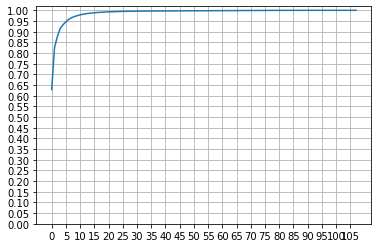

In [140]:
#绘制图形
plt.plot([i for i in range(X.shape[1])],
            [np.sum(ratio[:i+1]) for i in range(X.shape[1])])
plt.xticks(np.arange(X.shape[1],step=5))
plt.yticks(np.arange(0,1.01,0.05))
plt.grid()
plt.show()

In [174]:
# Split test and train data 
# 此时X变为df_pca，特征值为64
X_train, X_test, Y_train, Y_test = train_test_split(df_pca, Y, test_size=0.25, random_state=2023)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(370515, 64) (123506, 64)
(370515, 1) (123506, 1)


In [171]:
# 没有降维的X
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2023)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(370515, 108) (123506, 108)
(370515, 1) (123506, 1)


## Training Mode

Gaussian Naive Bayes

In [158]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [165]:
%%time
model1.fit(X_train, Y_train.values.ravel())
Y_test_pred1 = model1.predict(X_test)

CPU times: user 1.05 s, sys: 332 ms, total: 1.38 s
Wall time: 1.97 s


In [166]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.747119549815797
Test score is: 0.7459880491636034


Decision Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [175]:
%%time
model2.fit(X_train, Y_train.values.ravel())
Y_test_pred2 = model2.predict(X_test)

CPU times: user 8.13 s, sys: 146 ms, total: 8.27 s
Wall time: 9.07 s


In [176]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9971391171747432
Test score is: 0.9971499360354963


! DT算法中，经过PCA降维的数据集训练和测试效果都比没有经过降维的数据好

RANDOM FOREST

In [177]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=40)

In [178]:
%%time
model3.fit(X_train, Y_train.values.ravel())
Y_test_pred3 = model3.predict(X_test)

CPU times: user 1min 19s, sys: 1.73 s, total: 1min 21s
Wall time: 1min 45s


In [179]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999595158090766
Test score is: 0.9995789678234256


SUPPORT VECTOR MACHINE

In [180]:
from sklearn.svm import SVC
model4 = SVC(gamma = 'scale')

In [181]:
%%time
model4.fit(X_train, Y_train.values.ravel())
Y_test_pred4 = model4.predict(X_test)

CPU times: user 5min 5s, sys: 5.8 s, total: 5min 10s
Wall time: 5min 49s


In [182]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9986613227534648
Test score is: 0.9987773873334089


LOGISTIC REGRESSION

In [183]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(max_iter=1200000)

In [184]:
%%time
model5.fit(X_train, Y_train.values.ravel())
Y_test_pred5 = model5.predict(X_test)

CPU times: user 1min 3s, sys: 7.53 s, total: 1min 11s
Wall time: 48.8 s


In [185]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9945697205241353
Test score is: 0.9943646462520039


GRADIENT BOOSTING CLASSIFIER

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(random_state=2023)

In [187]:
%%time
model6.fit(X_train, Y_train.values.ravel())
Y_test_pred6 = model6.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Artificial Neural Network

In [188]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [195]:
def fun():
    model = Sequential()
    
    #here 64 is output dimension
    model.add(Dense(64,input_dim =64,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [196]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

<ipython-input-196-70566fe50af8>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)


In [197]:
%%time
model7.fit(X_train, Y_train.values.ravel())
Y_test_pred7 = model7.predict(X_test)

Epoch 1/100
5790/5790 [==============================] - 12s 2ms/step - loss: 0.3683 - accuracy: 0.9004
Epoch 2/100
5790/5790 [==============================] - 10s 2ms/step - loss: 0.0791 - accuracy: 0.9848
Epoch 3/100
5790/5790 [==============================] - 9s 2ms/step - loss: 0.0692 - accuracy: 0.9848
Epoch 4/100
5790/5790 [==============================] - 9s 2ms/step - loss: 0.0669 - accuracy: 0.9848
Epoch 5/100
5790/5790 [==============================] - 12s 2ms/step - loss: 0.0630 - accuracy: 0.9848
Epoch 6/100
5790/5790 [==============================] - 16s 3ms/step - loss: 0.0609 - accuracy: 0.9848
Epoch 7/100
5790/5790 [==============================] - 17s 3ms/step - loss: 0.0598 - accuracy: 0.9848
Epoch 8/100
5790/5790 [==============================] - 10s 2ms/step - loss: 0.0591 - accuracy: 0.9848
Epoch 9/100
5790/5790 [==============================] - 11s 2ms/step - loss: 0.0582 - accuracy: 0.9848
Epoch 10/100
5790/5790 [==============================] - 8s 1ms/s

In [198]:
accuracy_score(Y_test,Y_test_pred7)

0.999117451783719

Testing accuracy

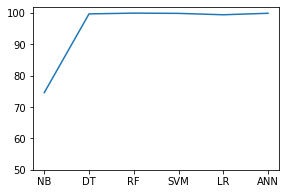

In [201]:
names = ['NB','DT','RF','SVM','LR','ANN']
values = [74.598,99.714,99.957,99.877,99.436,99.911]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(50,102)
plt.plot(names,values)